# Load dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [5]:
train_data_path=r"C:\Users\KIIT\Desktop\pythonaiml\Conda_1\house-prices-advanced-regression-techniques\train.csv"
test_data_path=r"C:\Users\KIIT\Desktop\pythonaiml\Conda_1\house-prices-advanced-regression-techniques\test.csv"
df_train=pd.read_csv(train_data_path)
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [6]:
df_test=pd.read_csv(test_data_path)
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [7]:
print("shape of df_train",df_train.shape)
print("shape of df_test",df_test.shape)

shape of df_train (1460, 81)
shape of df_test (1459, 80)


In [8]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [9]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [10]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

# Data Integration

In [11]:
df=pd.concat([df_train,df_test])
print("shape of integrated data",df.shape)

shape of integrated data (2919, 81)


In [12]:
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [13]:
df.tail(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1455          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1456          1996     Gable  CompShg     VinylSd     VinylSd        NaN   
1457          1992     Gable  CompShg     HdBoard     Wd Shng        NaN   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1454         0.0        TA        TA     CBlock       TA       TA   
1455         0.0        TA        TA     CBlock       TA       TA   
1456         0.0        TA        TA     CBlock       TA       TA   
1457         0.0        TA        TA      PConc       Gd       TA   
1458        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454           No          Unf         0.0          Unf         0.0   
1455           No          Rec       252.0          Unf         0.0   
1456           No          ALQ      1224.0          Unf         0.0   
1457           Av          GLQ       337.0          Unf         0.0   
1458           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1454      546.0        546.0    GasA        Gd          Y      SBrkr   
1455      294.0        546.0    GasA        TA          Y      SBrkr   
1456        0.0       1224.0    GasA        Ex          Y      SBrkr   
1457      575.0        912.0    GasA        TA          Y      SBrkr   
1458      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454       546       546             0       1092           0.0           0.0   
1455       546       546             0       1092           0.0           0.0   
1456      1224         0             0       1224           1.0           0.0   
1457       970         0             0        970           0.0           1.0   
1458       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1454         1         1             3             1          TA   
1455         1         1             3             1          TA   
1456         1         0             4             1          TA   
1457         1         0             3             1          TA   
1458         2         1             3             1          TA   

   

# get the brief description of dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [15]:
int_features=df.select_dtypes(include=["int64"]).columns
int_features.shape[0],int_features.tolist()

(26,
 ['Id',
  'MSSubClass',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold'])

In [16]:
float_features=df.select_dtypes(include=["float64"]).columns
float_features.shape[0],float_features.tolist()

(12,
 ['LotFrontage',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'BsmtFullBath',
  'BsmtHalfBath',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'SalePrice'])

In [17]:
cat_features=df.select_dtypes(include=["object"]).columns
cat_features.shape[0],cat_features.tolist()

(43,
 ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'PoolQC',
  'Fence',
  'MiscFeature',
  'SaleType',
  'SaleCondition'])

# get the statistical information to numerical data

In [18]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

In [19]:
df.describe().shape

(8, 38)

In [20]:
df["MSSubClass"]

0        60
1        20
2        60
3        70
4        60
5        50
6        20
7        60
8        50
9       190
10       20
11       60
12       20
13       20
14       20
15       45
16       20
17       90
18       20
19       20
20       60
21       45
22       20
23      120
24       20
25       20
26       20
27       20
28       20
29       30
30       70
31       20
32       20
33       20
34      120
35       60
36       20
37       20
38       20
39       90
40       20
41       20
42       85
43       20
44       20
45      120
46       50
47       20
48      190
49       20
50       60
51       50
52       90
53       20
54       80
55       20
56      160
57       60
58       60
59       20
60       20
61       75
62      120
63       70
64       60
65       60
66       20
67       20
68       30
69       50
70       20
71       20
72       60
73       20
74       50
75      180
76       20
77       50
78       90
79       50
80       60
81      120
82       20
83  

# Handling Missing Value
## Visualize missing values

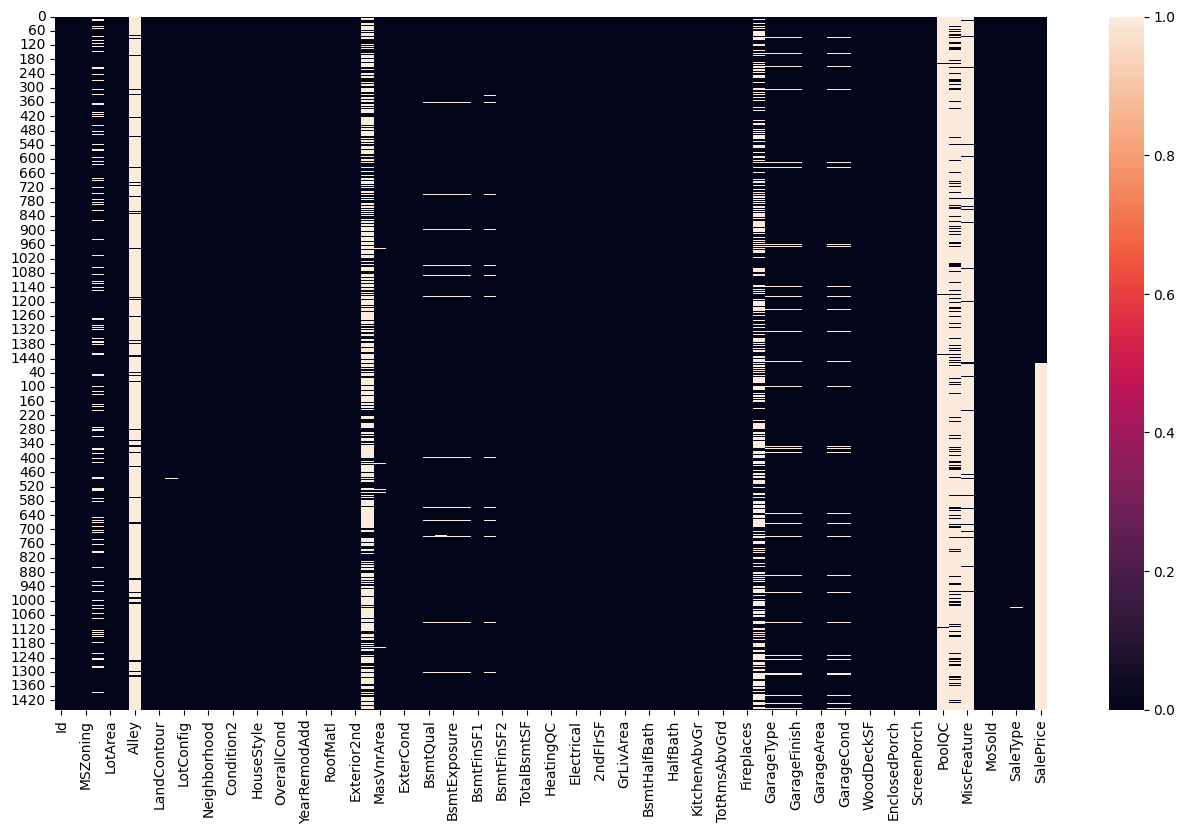

In [21]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("eda.png")

# Get the null value percentage of every feature

In [22]:
#set index id
ind=df.set_index("Id")


In [23]:
null_data=df.isnull().sum()
null_data

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [24]:
null_perc=df.isnull().sum()/df.shape[0]*100
null_perc

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

## As per observation ,we will not drop any feature from dataset

In [25]:
miss_val_50_perc=null_perc[null_perc>50]
miss_val_50_perc

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [26]:
# as per domain knowledge we will not drop these features,we will add constatnt value
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [27]:
# as per domain knowledge we will not drop FireplaceQu features,we will add constatnt value
miss_val_20_50_perc=null_perc[(null_perc>20) & (null_perc<50)]
miss_val_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [28]:
# as per domain knowledge we will not drop FireplaceQu features,we will add constatnt value
miss_val_5_20_perc=null_perc[(null_perc>5) & (null_perc<20)]
miss_val_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [29]:
df["LotFrontage"].value_counts().head()

LotFrontage
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: count, dtype: int64

<Axes: >

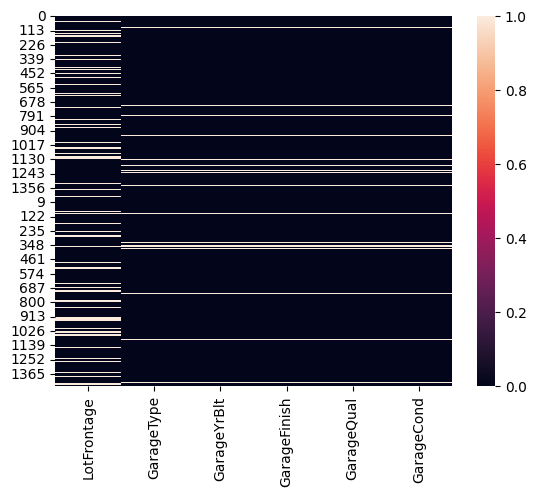

In [30]:
sns.heatmap(df[miss_val_5_20_perc.keys()].isnull())

## Missing value Imputation

In [31]:
missing_val_feat=null_perc[null_perc>0]
print("Total missing value features:",missing_val_feat)

Total missing value features: MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64


In [32]:
int_na_feat=missing_val_feat[missing_val_feat.keys().isin(int_features)]
print("Total number of missing catagory features=",len(int_na_feat))
int_na_feat

Total number of missing catagory features= 0


Series([], dtype: float64)

In [33]:
float_na_feat=missing_val_feat[missing_val_feat.keys().isin(float_features)]
print("Total number of missing catagorical features=",len(float_na_feat))
float_na_feat

Total number of missing catagorical features= 12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

In [34]:
# numdata=missing_val_feat-float_na_feat
# print("total numb of missing num data",len(numdata))
# numdata

# Handling MSZoning=0.137033

In [35]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [36]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

### Backup of Original data

In [37]:
df_mvi=df.copy()
df_mvi.shape

(2919, 81)

In [38]:
mszoning=df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan,mszoning,inplace=True)
df_mvi["MSZoning"].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\4091624137.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan,mszoning,inplace=True)


0

In [39]:
def old_new_Countplot(df,df_new,feature):
    plt.subplot(121)
    sns.countplot(df[feature])
    plt.title("Old Data Distribution")
    plt.subplot(122)
    sns.countplot(df_new[feature])
    plt.title("New Data Distribution")

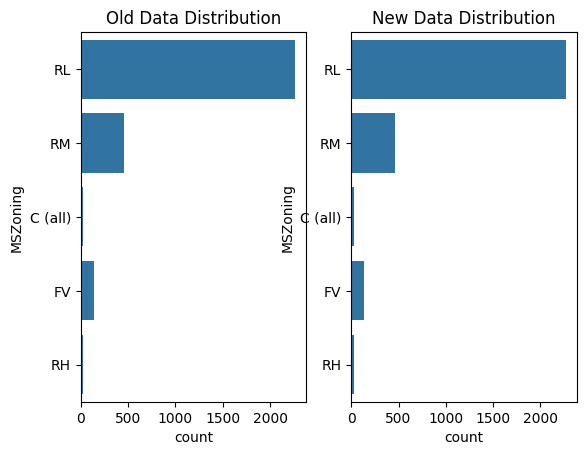

In [40]:
old_new_Countplot(df,df_mvi,"MSZoning")

### handling Alley=93.216855

In [41]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Alley'>

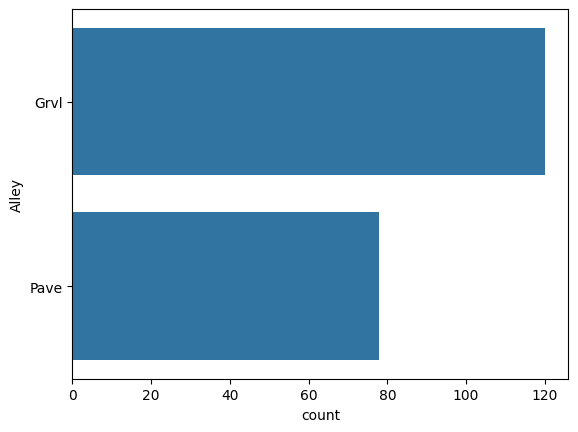

In [42]:
sns.countplot(df["Alley"])

In [43]:
alley_cont="NA"
df_mvi["Alley"].replace(np.nan,alley_cont,inplace=True)
df_mvi["Alley"].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\2205114364.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan,alley_cont,inplace=True)


0

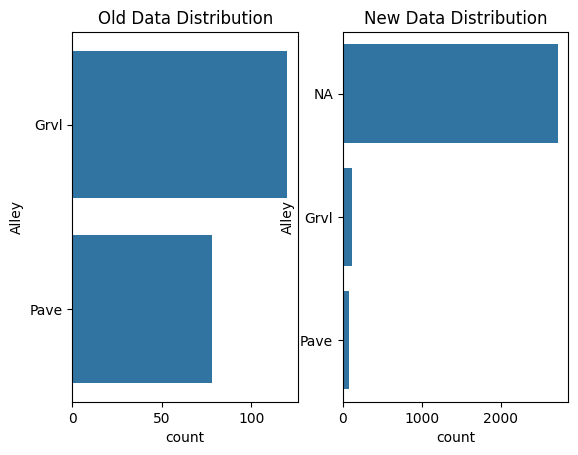

In [44]:
old_new_Countplot(df,df_mvi,"Alley")

# Handling LotFrontage=16.649538

In [45]:
def BoxHistplot(df,figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.distplot(df)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\4074386281.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


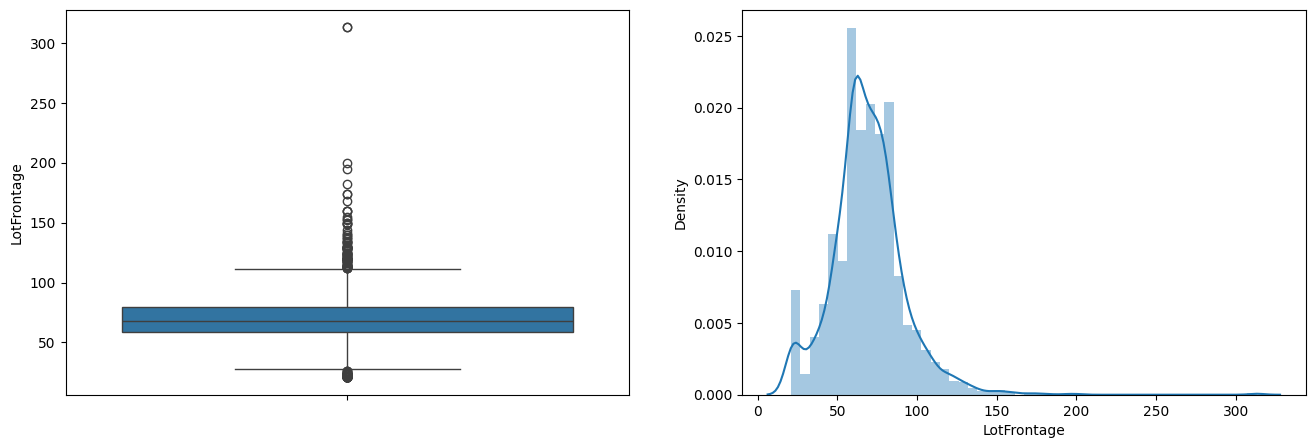

In [46]:
BoxHistplot(df["LotFrontage"])

In [47]:
LotFrontage_mean=df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan, LotFrontage_mean, inplace=True)
df_mvi["LotFrontage"].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\1441376761.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan, LotFrontage_mean, inplace=True)


0

In [48]:
def old_new_BoxHistplot(df,df_new,feature,figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title("Old Data Distribution")
    plt.subplot(222)
    sns.distplot(df[feature])
    plt.title("Old Data Distribution")

    
    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.title("New Data Distribution")
    plt.subplot(224)
    sns.distplot(df_new[feature])
    plt.title("New Data Distribution")

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\3418124427.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\3418124427.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature])


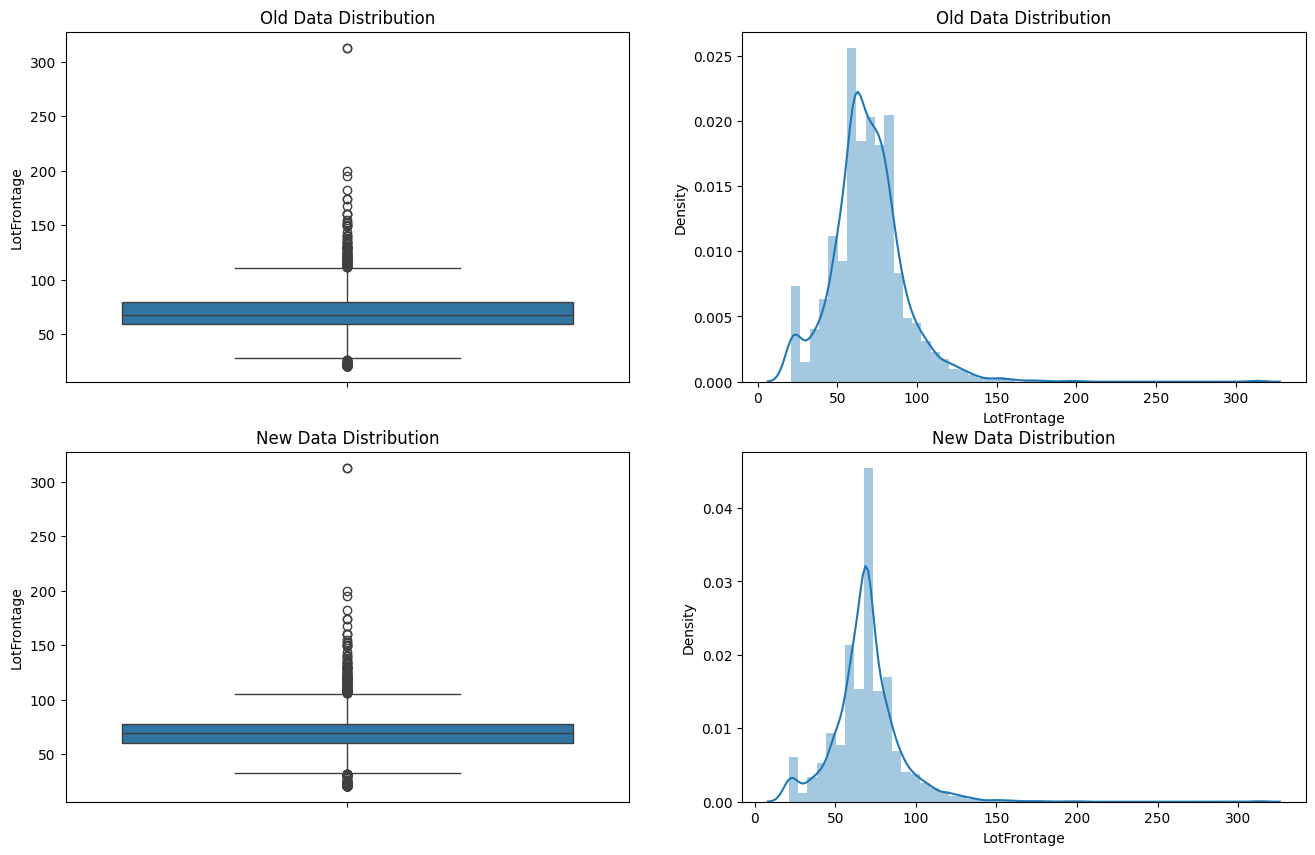

In [49]:
old_new_BoxHistplot(df,df_mvi,"LotFrontage")

### Handling Utilities=0.068517

In [50]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [51]:
utility_mode=df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan,utility_mode,inplace=True)
df_mvi["Utilities"].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\207265740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan,utility_mode,inplace=True)


0

### Handling Exterior1st=0.034258,Exterior2nd=0.034258

In [52]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [53]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [54]:
Exterior1st_mode=df["Exterior1st"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan,Exterior1st_mode,inplace=True)
print("E1st is null",df_mvi["Exterior1st"].isnull().sum())
Exterior2nd_mode=df["Exterior2nd"].mode()[0]
df_mvi["Exterior2nd"].replace(np.nan,Exterior2nd_mode,inplace=True)
print("E2nd is null",df_mvi["Exterior2nd"].isnull().sum())

E1st is null 0
E2nd is null 0


C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\1115367703.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan,Exterior1st_mode,inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\1115367703.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

### Handling MasVnrType=60.500171--->numerical ,MasVnrArea=0.787941-->catagorical.... both at the same time

<Axes: >

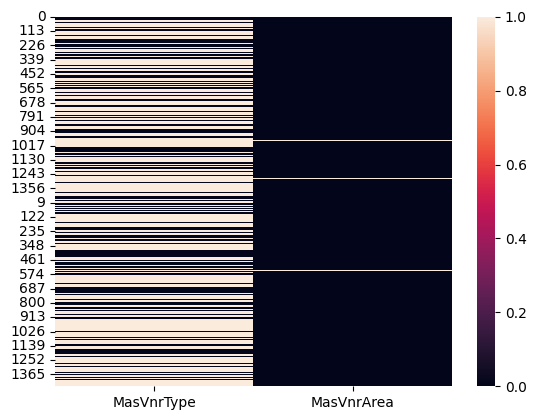

In [55]:
sns.heatmap(df[["MasVnrType","MasVnrArea"]].isnull())

In [56]:
df[df[["MasVnrType","MasVnrArea"]].isnull().any(axis=1)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pave   NaN      Reg   
50      51          60       RL          NaN    13869   Pave   NaN      IR2   
51      52          50       RM         52.0     6240   Pave   NaN      Reg   
52      53          90       RM        110.0     8472   Grvl   NaN      IR2   
53      54          20       RL         68.0    50271   Pave   NaN      IR1   
54      55          80       RL         60.0     7134   Pave   NaN      Reg   
57      58          60       RL         89.0    11645   Pave   NaN      IR1   
59      60          20       RL         60.0     7200   Pave   NaN      Reg   
60      61          20       RL         63.0    13072   Pave   NaN      Reg   
61      62          75       RM         60.0     7200   Pave   NaN      Reg   
63      64          70       RM         50.0    10300   Pave   NaN      IR1   
68      69          30       RM         47.0     4608   Pave   NaN      Reg   
69      70          50       RL         81.0    15593   Pave   NaN      Reg   
71      72          20       RL         69.0     7599   Pave   NaN      Reg   
74      75          50       RM         60.0     5790   Pave   NaN      Reg   
75      76         180       RM         21.0     1596   Pave   NaN      Reg   
76      77          20       RL          NaN     8475   Pave   NaN      IR1   
77      78          50       RM         50.0     8635   Pave   NaN      Reg   
78      79          90       RL         72.0    10778   Pa

In [57]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [58]:
MasVnrType_mode=df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan,MasVnrType_mode,inplace=True)
df_mvi["MasVnrType"].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\159009430.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan,MasVnrType_mode,inplace=True)


0

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\4074386281.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


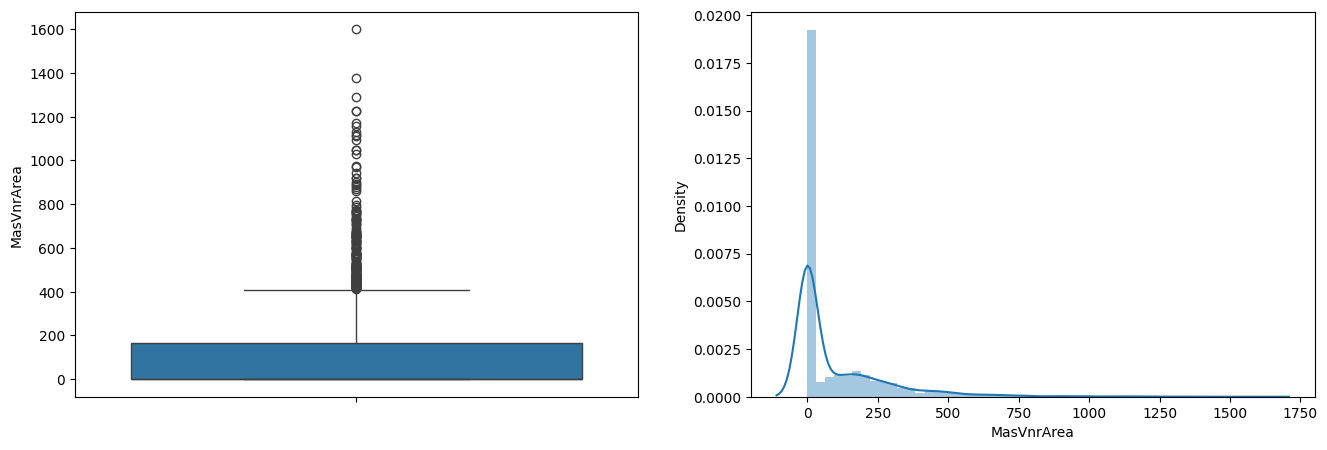

In [59]:
BoxHistplot(df["MasVnrArea"])

In [60]:
MasVnrArea_const=0
df_mvi["MasVnrArea"].replace(np.nan,MasVnrArea_const,inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\2005800172.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrArea"].replace(np.nan,MasVnrArea_const,inplace=True)


0

# Handling Basement features

* BsmtQual         2.774923
* BsmtCond         2.809181
* BsmtExposure     2.809181
* BsmtFinType1     2.706406
* BsmtFinSF1       0.034258
* BsmtFinType2     2.740665
* BsmtFinSF2       0.034258
* BsmtUnfSF        0.034258
* TotalBsmtSF      0.034258
* Electrical       0.034258
* BsmtFullBath     0.068517
* BsmtHalfBath     0.068517

In [61]:
cat_bsmt_feat=["BsmtQual",
"BsmtCond",       
"BsmtExposure",     
"BsmtFinType1",
"BsmtFinType2"]

num_bsmt_feat=[
"BsmtFinSF1",           
"BsmtFinSF2",    
"BsmtUnfSF",        
"TotalBsmtSF",            
"BsmtFullBath",     
"BsmtHalfBath"]     

<Axes: >

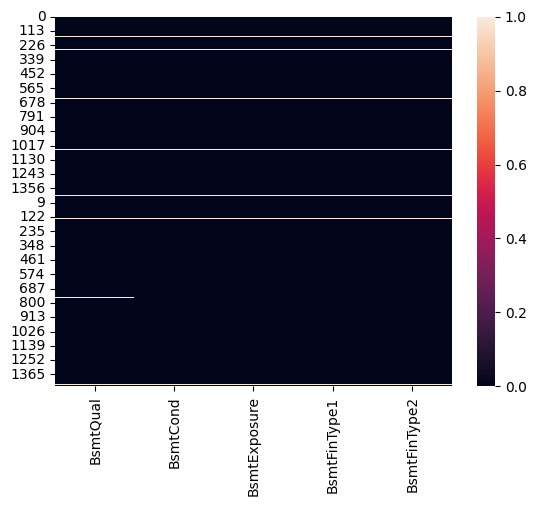

In [62]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [63]:
for feat in cat_bsmt_feat:
    print(f"value count of {feat}: {df[feat].value_counts()}")

value count of BsmtQual: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
value count of BsmtCond: BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
value count of BsmtExposure: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
value count of BsmtFinType1: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
value count of BsmtFinType2: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [64]:
bsmt_cont="NA"

for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_cont,inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\2375863897.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_cont,inplace=True)


In [65]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: >

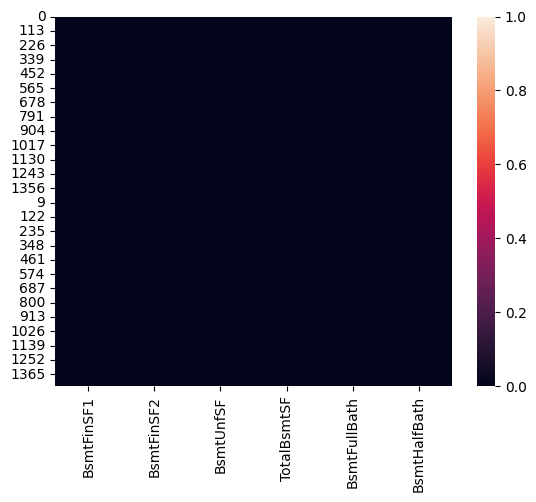

In [66]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [67]:
df_bsmt=df[cat_bsmt_feat+num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
17        NaN      NaN          NaN          NaN          NaN         0.0   
39        NaN      NaN          NaN          NaN          NaN         0.0   
90        NaN      NaN          NaN          NaN          NaN         0.0   
102       NaN      NaN          NaN          NaN          NaN         0.0   
156       NaN      NaN          NaN          NaN          NaN         0.0   
182       NaN      NaN          NaN          NaN          NaN         0.0   
259       NaN      NaN          NaN          NaN          NaN         0.0   
332        Gd       TA           No          GLQ          NaN      1124.0   
342       NaN      NaN          NaN          NaN          NaN         0.0   
362       NaN      NaN          NaN          NaN          NaN         0.0   
371       NaN      NaN          NaN          NaN          NaN         0.0   
392       NaN      NaN          NaN          NaN          NaN         0.0   
520       NaN      NaN          NaN          NaN          NaN         0.0   
532       NaN      NaN          NaN          NaN          NaN         0.0   
533       NaN      NaN          NaN          NaN          NaN         0.0   
553       NaN      NaN          NaN          NaN          NaN         0.0   
646       NaN      NaN          NaN          NaN          NaN         0.0   
705       NaN      NaN          NaN          NaN          NaN         0.0   
736       NaN      NaN          NaN          NaN          NaN         0.0   
749       NaN      NaN          NaN          NaN          NaN         0.0   
778       NaN      NaN          NaN          NaN          NaN         0.0   
868       NaN      NaN          NaN          NaN          NaN         0.0   
894       NaN      NaN          NaN          NaN          NaN         0.0   
897       NaN      NaN          NaN          NaN          NaN         0.0   
948        Gd       TA          NaN          Unf          Unf         0.0   
984       NaN      NaN          NaN          NaN          NaN         0.0   
1000      NaN      NaN          NaN          NaN          NaN         0.0   
1011      NaN      NaN          NaN          NaN          NaN         0.0   
1035      NaN      NaN          NaN          NaN          NaN         0.0   
1045      NaN      NaN          NaN          NaN          NaN         0.0   
1048      NaN      NaN          NaN          NaN          NaN         0.0   
1049      NaN      NaN          NaN          NaN          NaN         0.0   
1090      NaN      NaN          NaN          NaN          NaN         0.0   
1179      NaN      NaN          NaN          NaN          NaN         0.0   
1216      NaN      NaN          NaN          NaN          NaN         0.0   
1218      NaN      NaN          NaN          NaN          NaN         0.0   
1232      NaN      NaN          NaN          NaN          NaN         0.0   
1321      NaN      NaN          NaN          NaN          NaN         0.0   
1412      NaN      NaN          NaN          NaN          NaN         0.0   
27         Gd       TA          NaN          Unf          Unf         0.0   
125       NaN      NaN          NaN          NaN          NaN         0.0   
133       NaN      NaN          NaN          NaN          NaN         0.0   
269       NaN      NaN          NaN          NaN          NaN         0.0   
318       NaN      NaN          NaN          NaN          NaN         0.0   
354       NaN      NaN          NaN          NaN          NaN         0.0   
387       NaN      NaN          NaN          NaN          NaN         0.0   
388       NaN      NaN          NaN          NaN          NaN         0.0   
396       NaN      NaN          NaN          NaN          NaN         0.0   
397       NaN      NaN          NaN          NaN          NaN         0.0   
398       NaN      NaN          NaN          NaN          NaN         0.0   
400       NaN      NaN          NaN          NaN          NaN         0.0   
4

In [68]:
bsmt_num=0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_num,inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\2440883447.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_num,inplace=True)


In [69]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

### handling Electrical= 0.034258 & KitchenQual=0.034258

In [70]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [71]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [72]:
df_elk=df[["Electrical","KitchenQual","KitchenAbvGr"]]
df_elk[df_elk.isnull().any(axis=1)]

Electrical KitchenQual  KitchenAbvGr
1379        NaN          Gd             1
95        SBrkr         NaN             1

In [73]:
Electrical_mode=df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan,Electrical_mode,inplace=True)
df_mvi["Electrical"].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\1204426219.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].replace(np.nan,Electrical_mode,inplace=True)


0

In [74]:
KitchenQual_mode=df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan,KitchenQual_mode,inplace=True)
df_mvi["KitchenQual"].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\3541065422.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].replace(np.nan,KitchenQual_mode,inplace=True)


0

# Handling remaining cat_features

Functional       0.068517 mode
FireplaceQu     48.646797 na
PoolQC          99.657417 na
Fence           80.438506 na
MiscFeature     96.402878 na
SaleType         0.034258 mode

In [75]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [76]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [77]:
Functional_mode=df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan,Functional_mode,inplace=True)
df_mvi["Functional"].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\2065359765.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].replace(np.nan,Functional_mode,inplace=True)


0

In [78]:
SaleType_mode=df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan,SaleType_mode,inplace=True)
df_mvi["SaleType"].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\1551023343.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["SaleType"].replace(np.nan,SaleType_mode,inplace=True)


0

In [79]:
other_cat_feat=["PoolQC",
                "Fence",
                "MiscFeature",
                "FireplaceQu"]

In [80]:
for feat in other_cat_feat:
    print(f"value count of {feat} :{df[feat].value_counts()}")

value count of PoolQC :PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
value count of Fence :Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
value count of MiscFeature :MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64
value count of FireplaceQu :FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64


In [81]:
FireplaceQu_mode="NA"
df_mvi["FireplaceQu"].replace(np.nan,FireplaceQu_mode,inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\2333661320.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["FireplaceQu"].replace(np.nan,FireplaceQu_mode,inplace=True)


0

In [82]:
PoolQC_mode="NA"
df_mvi["PoolQC"].replace(np.nan,PoolQC_mode,inplace=True)
df_mvi["PoolQC"].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\4052099312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["PoolQC"].replace(np.nan,PoolQC_mode,inplace=True)


0

In [83]:
Fence_mode="NA"
df_mvi["Fence"].replace(np.nan,Fence_mode,inplace=True)
df_mvi["Fence"].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\3788636090.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Fence"].replace(np.nan,Fence_mode,inplace=True)


0

In [84]:
MiscFeature_mode="NA"
df_mvi["MiscFeature"].replace(np.nan,MiscFeature_mode,inplace=True)
df_mvi["MiscFeature"].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\1409277484.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MiscFeature"].replace(np.nan,MiscFeature_mode,inplace=True)


0

# Handling garage features

GarageType       5.378554 na
GarageFinish     5.447071  na
GarageQual       5.447071 na
GarageCond       5.447071 na

GarageYrBlt      5.447071 0 
GarageCars       0.034258 0
GarageArea       0.034258 0


In [85]:
num_garage_feat=["GarageType","GarageFinish","GarageQual","GarageCond"]
cat_garage_feat=["GarageYrBlt","GarageCars","GarageArea"]
df_garage=df[num_garage_feat+cat_garage_feat]
df_garage[df_garage.isnull().any(axis=1)]

GarageType GarageFinish GarageQual GarageCond  GarageYrBlt  GarageCars  \
39          NaN          NaN        NaN        NaN          NaN         0.0   
48          NaN          NaN        NaN        NaN          NaN         0.0   
78          NaN          NaN        NaN        NaN          NaN         0.0   
88          NaN          NaN        NaN        NaN          NaN         0.0   
89          NaN          NaN        NaN        NaN          NaN         0.0   
99          NaN          NaN        NaN        NaN          NaN         0.0   
108         NaN          NaN        NaN        NaN          NaN         0.0   
125         NaN          NaN        NaN        NaN          NaN         0.0   
127         NaN          NaN        NaN        NaN          NaN         0.0   
140         NaN          NaN        NaN        NaN          NaN         0.0   
148         NaN          NaN        NaN        NaN          NaN         0.0   
155         NaN          NaN        NaN        NaN          NaN         0.0   
163         NaN          NaN        NaN        NaN          NaN         0.0   
165         NaN          NaN        NaN        NaN          NaN         0.0   
198         NaN          NaN        NaN        NaN          NaN         0.0   
210         NaN          NaN        NaN        NaN          NaN         0.0   
241         NaN          NaN        NaN        NaN          NaN         0.0   
250         NaN          NaN        NaN        NaN          NaN         0.0   
287         NaN          NaN        NaN        NaN          NaN         0.0   
291         NaN          NaN        NaN        NaN          NaN         0.0   
307         NaN          NaN        NaN        NaN          NaN         0.0   
375         NaN          NaN        NaN        NaN          NaN         0.0   
386         NaN          NaN        NaN        NaN          NaN         0.0   
393         NaN          NaN        NaN        NaN          NaN         0.0   
431         NaN          NaN        NaN        NaN          NaN         0.0   
434         NaN          NaN        NaN        NaN          NaN         0.0   
441         NaN          NaN        NaN        NaN          NaN         0.0   
464         NaN          NaN        NaN        NaN          NaN         0.0   
495         NaN          NaN        NaN        NaN          NaN         0.0   
520         NaN          NaN        NaN        NaN          NaN         0.0   
528         NaN          NaN        NaN        NaN          NaN         0.0   
533         NaN          NaN        NaN        NaN          NaN         0.0   
535         NaN          NaN        NaN        NaN          NaN         0.0   
562         NaN          NaN        NaN        NaN          NaN         0.0   
582         NaN          NaN        NaN        NaN          NaN         0.0   
613         NaN          NaN        NaN        NaN          NaN         0.0   
614         NaN          NaN        NaN        NaN          NaN         0.0   
620         NaN          NaN        NaN        NaN          NaN         0.0   
635         NaN          NaN        NaN        NaN          NaN         0.0   
636         NaN          NaN        NaN        NaN          NaN         0.0   
638         NaN          NaN        NaN        NaN          NaN         0.0   
649         NaN          NaN        NaN        NaN          NaN         0.0   
705         NaN          NaN        NaN        NaN          NaN         0.0   
710         NaN          NaN        NaN        NaN          NaN         0.0   
738         NaN          NaN        NaN        NaN          NaN         0.0   
750         NaN          NaN        NaN        NaN          NaN         0.0   
784         NaN          NaN        NaN        NaN          NaN         0.0   
826         NaN          NaN        NaN        NaN          NaN         0.0   
843         NaN          NaN        NaN        NaN          NaN         0.0   
921         NaN          NaN        NaN        NaN     

In [86]:
garage_cat="NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan,garage_cat,inplace=True)
df_mvi[cat_garage_feat].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\3686670195.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,garage_cat,inplace=True)


GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [87]:
garage_num=0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan,garage_num,inplace=True)
df_mvi[num_garage_feat].isnull().sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15248\1405157093.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,garage_num,inplace=True)


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [88]:
df_mvi.isnull().any(axis=1).sum()

1459

# Feature handling
## Converting numerical to catagorical feature

In [89]:
feat_for_num_conv=["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
for feat in feat_for_num_conv:
    print(f"{feat}: data type={df_mvi[feat].dtype}")

MSSubClass: data type=int64
YearBuilt: data type=int64
YearRemodAdd: data type=int64
GarageYrBlt: data type=object
MoSold: data type=int64
YrSold: data type=int64


In [90]:
df_mvi[feat_for_num_conv].head()

MSSubClass  YearBuilt  YearRemodAdd GarageYrBlt  MoSold  YrSold
0          60       2003          2003      2003.0       2    2008
1          20       1976          1976      1976.0       5    2007
2          60       2001          2002      2001.0       9    2008
3          70       1915          1970      1998.0       2    2006
4          60       2000          2000      2000.0      12    2008

In [91]:
df_mvi["MoSold"].value_counts()

MoSold
6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: count, dtype: int64

In [92]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [93]:
import calendar

In [94]:
calendar.month_abbr[7]

'Jul'

In [95]:
df_mvi["MoSold"]=df_mvi["MoSold"].apply(lambda x:calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [96]:
for feat in feat_for_num_conv:
    df_mvi[feat]=df_mvi[feat].astype(str)

In [97]:
for feat in feat_for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


## converting catagorical to numerical
### Ordinal Encoding

In [98]:
ordinal_end_var=["ExterQual",
"ExterCond",
"BsmtQual",           
"BsmtCond",
"BsmtExposure",      
"BsmtFinType1",      
"BsmtFinSF1",    
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
"GarageQual",
"GarageCond",
"PoolQc",
"GarageFinish",
"Functional",
"PavedDrive",
"Utilities"]
print("total numbers of features to convert catagorical to numerical",len(ordinal_end_var))

total numbers of features to convert catagorical to numerical 18


In [99]:
from pandas.api.types import CategoricalDtype

In [100]:
df_mvi["ExterQual"].value_counts()

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64

In [101]:
df_mvi["ExterQual"]=df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [102]:
df_mvi["ExterQual"].unique()

array([3, 2, 4, 1], dtype=int8)

In [103]:
df_mvi["ExterQual"].value_counts()

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64

In [104]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: count, dtype: int64

In [105]:
df_mvi["BsmtExposure"]=df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA","No","Mn","Av","Gd"],ordered=True)).cat.codes

In [106]:
df_mvi["BsmtExposure"].unique()

array([1, 4, 2, 3, 0], dtype=int8)

In [107]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
1    1904
3     418
4     276
2     239
0      82
Name: count, dtype: int64

In [108]:
df_mvi["ExterCond"]=df_mvi["ExterCond"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtQual"]=df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtCond"]=df_mvi["BsmtCond"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtFinType1"]=df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","BLQ","Rec","ALQ"," GLQ"],ordered=True)).cat.codes
df_mvi["BsmtFinType2"]=df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","BLQ","Rec","ALQ"," GLQ"],ordered=True)).cat.codes
df_mvi["HeatingQC"]=df_mvi["HeatingQC"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["KitchenQual"]=df_mvi["KitchenQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["FireplaceQu"]=df_mvi["FireplaceQu"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["GarageQual"]=df_mvi["GarageQual"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["GarageCond"]=df_mvi["GarageCond"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["PoolQC"]=df_mvi["PoolQC"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["Functional"]=df_mvi["Functional"].astype(CategoricalDtype(categories=["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"],ordered=True)).cat.codes
df_mvi["GarageFinish"]=df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["NA","Unf","RFn","Fin"],ordered=True)).cat.codes
df_mvi["PavedDrive"]=df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N","P","Y"],ordered=True)).cat.codes
df_mvi["Utilities"]=df_mvi["Utilities"].astype(CategoricalDtype(categories=["ELO","NoSeWa","NoSeWr","AllPub"],ordered=True)).cat.codes

In [109]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   int8   
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

# OneHotEncoding for nominal catagorical dat

In [110]:
df_encod=df_mvi.copy()
object_feat=df_encod.select_dtypes(include="object").columns.tolist()
print("total numbers of data",len(object_feat))
object_feat

total numbers of data 34


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [111]:
print("shape of df before encoding",df_encod.shape)
df_encod=pd.get_dummies(df_encod,
                        columns=object_feat,
                        prefix=object_feat,
                        drop_first=True)
print("shape of df after encoding",df_encod.shape)

shape of df before encoding (2919, 81)
shape of df after encoding (2919, 1120)


In [115]:
# df_encod["MSZoning"].value_counts()

In [116]:
# pd.get_dummies(df_encod["MSZoning"],columns="MSZoning",prefix="MSZoning",drop_first=True)

In [117]:
df_encod.head(2)

Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  MasVnrArea  \
0   1         65.0     8450          3            7            5       196.0   
1   2         80.0     9600          3            6            8         0.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          2         4         3             1            -1   
1          2          2         4         3             4             5   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0       706.0             1         0.0      150.0        856.0          4   
1       978.0             1         0.0      284.0       1262.0          4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710           1.0           0.0   
1      1262         0             0       1262           0.0           1.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            3             8   
1         2         0             3             1            2             6   

   Functional  Fireplaces  FireplaceQu  GarageFinish  GarageQual  GarageCond  \
0           7           0            0             2           3           3   
1           7           1            3             2           3           3   

   PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0           2           0           61              0          0            0   
1           2         298            0              0          0            0   

   PoolArea  PoolQC  MiscVal  SalePrice  MSSubClass_150  MSSubClass_160  \
0         0      -1        0   208500.0           False           False   
1         0      -1        0   181500.0           False           False   

   MSSubClass_180  MSSubClass_190  MSSubClass_20  MSSubClass_30  \
0           False           False          False          False   
1           False           False           True          False   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0          False          False          False           True          False   
1          False          False          False          False          False   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSZoning_FV  \
0          False          False          False          False        False   
1          False          False          False          False        False   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_NA  Alley_Pave  \
0        False         True        False         True      True       False   
1        False         True        False         True      True       False   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0         False         False          True            False            False   
1         False         False          True            False            False   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0             True              False          False          False   
1             True              False           True          False   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0              True          False          False                 False   
1             False          False          False                 False   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                False                 False                 False   
1                False                 False                 False   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                  True                 False                 False   
1                 False                 False                 False   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                 F

In [118]:
df_encod.select_dtypes(include="object").columns.tolist()

[]

# Spliting into training and test

In [120]:
len_train=df_train.shape[0]
len_train

1460

In [122]:
X_train=df_encod[:len_train].drop("SalePrice",axis=1)
y_train=df_encod["SalePrice"][:len_train]

In [124]:
X_test=df_encod[:len_train].drop("SalePrice",axis=1)
X_train.shape,y_train.shape,X_test.shape

((1460, 1119), (1460,), (1460, 1119))

## Feature Scaling

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
sc=StandardScaler()
sc.fit(X_train)

StandardScaler()

In [128]:
#z=(x-u)/s

X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [129]:
X_train[:3,:]

array([[-1.73734433, -3.18558917, -1.05403863, ..., -1.13174002,
        -0.91964711, -1.39962799],
       [-1.7373387 , -3.15464897, -1.05402708, ..., -1.13174002,
        -0.91964711, -1.39962799],
       [-1.73733307, -3.17940113, -1.0540105 , ..., -1.13174002,
        -0.91964711, -1.39962799]])

In [130]:
X_test[:3,:]

array([[-1.73086488, -0.22335706, -0.20714171, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.7284922 ,  0.45789401, -0.09188637, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.72611953, -0.08710685,  0.07347998, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [133]:
sc.mean_

array([7.30500000e+02, 6.99179459e+01, 1.05168281e+04, ...,
       1.36986301e-02, 8.20547945e-01, 8.56164384e-02])

In [134]:
sc.n_features_in_

1119

In [135]:

sc.n_samples_seen_

1460

In [136]:
sc.with_mean

True

In [138]:
sc.scale_

array([4.21465598e+02, 2.20183141e+01, 9.97784611e+03, ...,
       1.16236731e-01, 3.83730393e-01, 2.79796826e-01])

In [139]:
sc.mean_

array([7.30500000e+02, 6.99179459e+01, 1.05168281e+04, ...,
       1.36986301e-02, 8.20547945e-01, 8.56164384e-02])

In [140]:
sc.with_std

True

In [141]:
df_encod.shape

(2919, 1120)

# Train ML model

In [150]:
!pip install xgboost

In [154]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

In [156]:
svr=SVR()
lr=LinearRegression()
sgd=SGDRegressor()
knn=KNeighborsRegressor()
gpr=GaussianProcessRegressor()
dtr=DecisionTreeRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
mlp=MLPRegressor()
xgb=XGBRegressor()
ir=IsotonicRegression()

In [158]:
models = {"a": ["LinearRegression", lr],
          "b": ["SVR", svr],
          "c": ["SGDRegressor", sgd],
          "d": ["KNeighborsRegressor", knn],
          "e": ["GaussianProcessRegressor", gpr],
          "f": ["DecisionTreeRegressor", dtr],
          "g": ["GradientBoostingRegressor", gbr],
          "h": ["RandomForestRegressor", rfr],
          "i": ["XGBRegressor", xgb],
          "j": ["MLPRegressor", mlp],
          "k": ["IsotonicRegression",ir]}

In [159]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model (model, X_train=X_train, y_train=y_train):
    cv=KFold(n_splits = 7, shuffle=True, random_state = 45)
    r2_scorer = make_scorer(r2_score)
    r2_val_score = cross_val_score (model, X_train, y_train, cv=cv, scoring = r2_scorer)
    score = [r2_val_score.mean()]

    return score

In [160]:
models_score = []
for model in models:
    print("Training model: ", models [model][0])
    score = test_model(models [model] [1], X_train, y_train)
    print("Score of model: ", score)
    models_score.append([models [model] [0], score [0]])

Training model:  LinearRegression
Score of model:  [-7.474073592840312e+27]
Training model:  SVR
Score of model:  [-0.05210762579053901]
Training model:  SGDRegressor
Score of model:  [-3.5835785890197233e+18]
Training model:  KNeighborsRegressor
Score of model:  [0.13271903457507175]
Training model:  GaussianProcessRegressor
Score of model:  [-5.399687898234086]
Training model:  DecisionTreeRegressor
Score of model:  [0.7050324847716463]
Training model:  GradientBoostingRegressor
Score of model:  [0.8661365560146168]
Training model:  RandomForestRegressor
Score of model:  [0.8430904567369001]
Training model:  XGBRegressor
Score of model:  [0.8611955560197689]
Training model:  MLPRegressor


C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

Score of model:  [-2.3521162105246574]
Training model:  IsotonicRegression


ValueError: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\isotonic.py", line 385, in fit
    X, y = self._build_y(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\isotonic.py", line 300, in _build_y
    self._check_input_data_shape(X)
  File "C:\Users\KIIT\Desktop\pythonaiml\Conda_1\env\Lib\site-packages\sklearn\isotonic.py", line 284, in _check_input_data_shape
    raise ValueError(msg)
ValueError: Isotonic regression input X should be a 1d array or 2d array with 1 feature


In [163]:
models_score

[['LinearRegression', -7.474073592840312e+27],
 ['SVR', -0.05210762579053901],
 ['SGDRegressor', -3.5835785890197233e+18],
 ['KNeighborsRegressor', 0.13271903457507175],
 ['GaussianProcessRegressor', -5.399687898234086],
 ['DecisionTreeRegressor', 0.7050324847716463],
 ['GradientBoostingRegressor', 0.8661365560146168],
 ['RandomForestRegressor', 0.8430904567369001],
 ['XGBRegressor', 0.8611955560197689],
 ['MLPRegressor', -2.3521162105246574]]